In [243]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Bordeaux.csv")
df

,Wine,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar
0,Lafite,2850,100,19.5,1,1,0,0,0
1,Latour,2850,98,18.5,1,1,0,0,0
2,Margaux,2900,100,19.5,1,1,0,0,0
3,Mouton,2500,97,17.0,1,1,0,0,0
4,Haut Brion,2500,98,18.5,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
67,Lafleur,5000,100,18.0,1,0,1,1,0
68,Gazin,300,90,16.0,0,0,0,1,0
69,Clinet,700,92,15.5,0,0,0,1,0
70,L'Eglise-Clinet,1400,96,18.0,1,0,0,1,0


In [244]:
# Set label and features
y = df['Price']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Price'])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     31.14
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           2.63e-18
Time:                        18:08:22   Log-Likelihood:                -591.26
No. Observations:                  72   AIC:                             1199.
Df Residuals:                      64   BIC:                             1217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ParkerPoints        25.3551     73.755  

In [245]:
for col in df:  
  if not pd.api.types.is_numeric_dtype(df[col]):
    df = pd.get_dummies(df, columns=[col], prefix=col, drop_first=True)

# Set label and features
y = df['Price']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Price'])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     31.14
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           2.63e-18
Time:                        18:08:22   Log-Likelihood:                -591.26
No. Observations:                  72   AIC:                             1199.
Df Residuals:                      64   BIC:                             1217.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ParkerPoints        25.3551     73.755  

In [246]:
df.select_dtypes(include=['number']).skew()

Price               3.703686
ParkerPoints        0.177766
CoatesPoints       -0.359983
P95andAbove         0.228393
FirstGrowth         2.133069
CultWine            3.459925
Pomerol             1.696514
VintageSuperstar    5.870056
dtype: float64

In [247]:
print(np.log(df.FirstGrowth).skew())
print(np.sqrt(df.FirstGrowth).skew())
print(np.square(df.FirstGrowth).skew())

nan
2.1330688885912634
2.1330688885912634


c:\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Python311\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [248]:
print(np.log(df.CultWine).skew())
print(np.sqrt(df.CultWine).skew())
print(np.square(df.CultWine).skew())

nan
3.459924870521875
3.459924870521875


In [249]:
print(np.log(df.VintageSuperstar).skew())
print(np.sqrt(df.VintageSuperstar).skew())
print(np.square(df.VintageSuperstar).skew())

nan
5.870056446254653
5.870056446254653


In [250]:
print(np.log(df.Pomerol).skew())
print(np.sqrt(df.Pomerol).skew())
print(np.square(df.Pomerol).skew())

nan
1.6965143296201162
1.6965143296201162


In [251]:
print(np.log(df.Price).skew())
print(np.sqrt(df.Price).skew())
print(np.square(df.Price).skew())

0.8934893971359469
2.14603112765657
5.434134286635621


It occured to me after running the pairplot that all the variables that were highly skewed were yes/no variables.

In [252]:
#sns.pairplot(df);

In [253]:
df['Price_Ln'] = np.log(df['Price'])
df

,Price,ParkerPoints,CoatesPoints,P95andAbove,FirstGrowth,CultWine,Pomerol,VintageSuperstar,Wine_Ausone,Wine_Batailley,...,Wine_Prieure-Lichine,Wine_Rauzan-Segla,Wine_Saint-Pierre,Wine_Talbot,Wine_Tertre-Roteboeuf,Wine_Troplong-Mondot,Wine_Trotanoy,Wine_Trottevieille,Wine_Vieux. Ch. Certan,Price_Ln
0,2850,100,19.5,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,7.955074
1,2850,98,18.5,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,7.955074
2,2900,100,19.5,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,7.972466
3,2500,97,17.0,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,7.824046
4,2500,98,18.5,1,1,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,7.824046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,5000,100,18.0,1,0,1,1,0,False,False,...,False,False,False,False,False,False,False,False,False,8.517193
68,300,90,16.0,0,0,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,5.703782
69,700,92,15.5,0,0,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,6.551080
70,1400,96,18.0,1,0,0,1,0,False,False,...,False,False,False,False,False,False,False,False,False,7.244228


In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

            Feature          VIF
0      ParkerPoints     6.070170
1      CoatesPoints     1.443836
2       P95andAbove     4.078230
3       FirstGrowth     1.655775
4          CultWine     1.200133
5           Pomerol     1.123699
6  VintageSuperstar     1.148701
7             const  3290.597439


In [255]:
# Set label and features
y = df['Price_Ln']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Price_Ln', "Price", "P95andAbove" ])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:               Price_Ln   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           3.86e-35
Time:                        18:08:23   Log-Likelihood:                -8.3520
No. Observations:                  72   AIC:                             30.70
Df Residuals:                      65   BIC:                             46.64
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ParkerPoints         0.1374      0.014  

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

            Feature          VIF
0      ParkerPoints     2.264813
1      CoatesPoints     1.440398
2       FirstGrowth     1.636806
3          CultWine     1.164025
4           Pomerol     1.123692
5  VintageSuperstar     1.124747
6             const  1153.062727


In [257]:
df.select_dtypes(include=['number']).skew()

Price               3.703686
ParkerPoints        0.177766
CoatesPoints       -0.359983
P95andAbove         0.228393
FirstGrowth         2.133069
CultWine            3.459925
Pomerol             1.696514
VintageSuperstar    5.870056
Price_Ln            0.893489
dtype: float64

np.float64(0.5187965600619736)

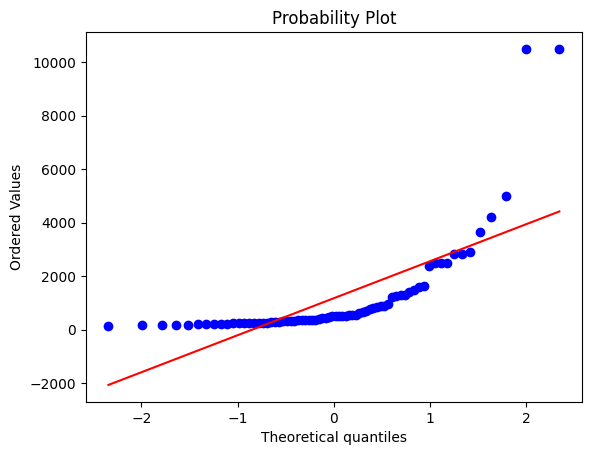

In [258]:
pred_val = model.fittedvalues.copy()
true_val = df['Price'].values.copy()
residual = true_val - pred_val

import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

np.float64(0.9861305128656858)

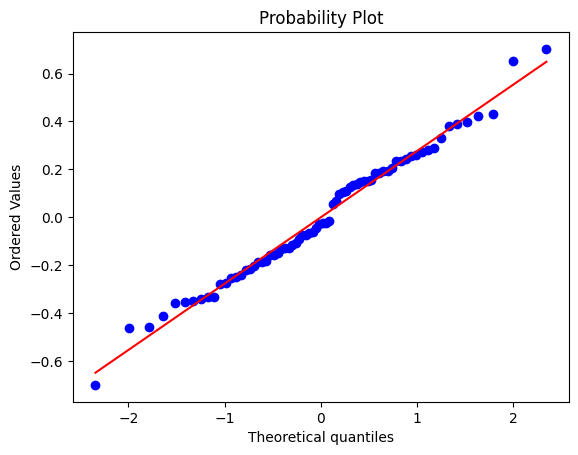

In [259]:
pred_val = model.fittedvalues.copy()
true_val = df['Price_Ln'].values.copy()
residual = true_val - pred_val

import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [260]:
df_insample = pd.DataFrame({'Actual':df['Price_Ln'], 
                            'Predicted':model.fittedvalues, 
                            'Residuals (Error)':df['Price_Ln'] - model.fittedvalues})

df_insample.head(10)

,Actual,Predicted,Residuals (Error)
0,7.955074,8.046257,-0.091183
1,7.955074,7.675080,0.279994
2,7.972466,8.046257,-0.073791
3,7.824046,7.393161,0.430885
4,7.824046,7.675080,0.148966
5,8.202482,8.046257,0.156226
6,8.342840,8.525913,-0.183073
7,9.259131,9.275795,-0.016664
8,6.779922,6.508220,0.271702
9,6.309918,6.467128,-0.157209


In [261]:
# Set label and features
y = df['Price_Ln']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Price_Ln', "Price", "P95andAbove" ])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:               Price_Ln   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     139.4
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           3.86e-35
Time:                        18:08:23   Log-Likelihood:                -8.3520
No. Observations:                  72   AIC:                             30.70
Df Residuals:                      65   BIC:                             46.64
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ParkerPoints         0.1374      0.014  

### Interpretation of the Bordeaux MLR Model (ANSWER FOR PROBLEM 1)

The assumptions for the Bordeaux dataset were violated. First, the normality assumption was not met. The skewness values for several variables, especially the dependent variable *Price*, were quite high (e.g., 3.70 for *Price* and 5.87 for *VintageSuperstar*), indicating non-normality. Other variables, such as *CultWine* (3.46), *Pomerol* (1.70), *FirstGrowth* (2.13), and *Price* (3.70), also showed significant skewness, further suggesting the data were not normally distributed.

To address normality, the dependent variable *Price* was log-transformed into *Price_Ln*, which reduced the skewness and helped normalize the data. This was confirmed by the improved probability plot and the Omnibus test result (0.228, p = 0.892). However, while it may appear it has been fixed, the values of other variables are still highly skewed. 

Regarding multicollinearity, no variables were removed since all VIF values were acceptable and none exceeded the threshold of 10. Additionally, autocorrelation is not a concern here, as the Durbin-Watson statistic (1.727) is within a reasonable range, indicating no major autocorrelation.


In [262]:
df = pd.read_table("defects.txt")
df

,Case,Temperature,Density,Rate,Defective
0,1,0.97,32.08,177.7,0.2
1,2,2.85,21.14,254.1,47.9
2,3,2.95,20.65,272.6,50.9
3,4,2.84,22.53,273.4,49.7
4,5,1.84,27.43,210.8,11.0
5,6,2.05,25.42,236.1,15.6
6,7,1.50,27.89,219.1,5.5
7,8,2.48,23.34,238.9,37.4
8,9,2.23,23.97,251.9,27.8
9,10,3.02,19.45,281.9,58.7


In [263]:
# Set label and features
y = df['Defective']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Defective'])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:              Defective   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     47.82
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           2.33e-11
Time:                        18:08:23   Log-Likelihood:                -98.665
No. Observations:                  30   AIC:                             207.3
Df Residuals:                      25   BIC:                             214.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Case            0.1658      0.164      1.012      

In [264]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

       Feature          VIF
0         Case     1.193181
1  Temperature    14.817360
2      Density    16.973134
3         Rate     6.689118
4        const  2853.889842


In [265]:
import statsmodels.api as sm

# Create a blank DataFrame to store the results
df_vif = pd.DataFrame(columns=['VIF', 'Tolerance'])
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)


df = df.astype(float)

for col in df.drop(columns=['Defective']):
  y = df[col]
  X = df.drop(columns=[col, 'Defective']).assign(const=1)
  
  r_squared = sm.OLS(y, X).fit().rsquared

  if r_squared < 1: # Prevent division by zero runtime error
    df_vif.loc[col] = [1/(1 - r_squared), 1 - r_squared]
  else:
    df_vif.loc[col] = ['infinity', 1 - r_squared]

df_vif.sort_values(by=['VIF'], ascending=False)

,VIF,Tolerance
Density,16.973134,0.058917
Temperature,14.817360,0.067488
Rate,6.689118,0.149497
Case,1.193181,0.838096


In [266]:
df.select_dtypes(include=['number']).skew()

Case           0.000000
Temperature   -0.461178
Density        0.496818
Rate          -0.541420
Defective      0.121713
dtype: float64

In [267]:
print(np.log(df.Temperature).skew())
print(np.sqrt(df.Temperature).skew())
print(np.square(df.Temperature).skew())

-0.9682341295927757
-0.6969450723887805
-0.0773152300244969


In [268]:
print(np.log(df.Density).skew())
print(np.sqrt(df.Density).skew())
print(np.square(df.Density).skew())

0.2458147638316686
0.37311336007698376
0.7337543908972884


In [269]:
print(np.log(df.Rate).skew())
print(np.sqrt(df.Rate).skew())
print(np.square(df.Rate).skew())

-0.8146655783092057
-0.6771648294079237
-0.2766808648287996


In [270]:
print(np.log(df.Defective).skew())
print(np.sqrt(df.Defective).skew())
print(np.square(df.Defective).skew())

-1.822691657660081
-0.499958203529613
0.8452579835671993


I will change Temperature, Density, and Rate.

In [271]:
df['Temperature_square'] = np.square(df['Temperature'])

In [272]:
df['Density_ln'] = np.log(df['Density'])

In [273]:
df['Rate_square'] = np.square(df['Rate'])
df

,Case,Temperature,Density,Rate,Defective,Temperature_square,Density_ln,Rate_square
0,1.0,0.97,32.08,177.7,0.2,0.9409,3.468233,31577.29
1,2.0,2.85,21.14,254.1,47.9,8.1225,3.051167,64566.81
2,3.0,2.95,20.65,272.6,50.9,8.7025,3.027715,74310.76
3,4.0,2.84,22.53,273.4,49.7,8.0656,3.114848,74747.56
4,5.0,1.84,27.43,210.8,11.0,3.3856,3.311637,44436.64
5,6.0,2.05,25.42,236.1,15.6,4.2025,3.235536,55743.21
6,7.0,1.50,27.89,219.1,5.5,2.2500,3.328268,48004.81
7,8.0,2.48,23.34,238.9,37.4,6.1504,3.150169,57073.21
8,9.0,2.23,23.97,251.9,27.8,4.9729,3.176803,63453.61
9,10.0,3.02,19.45,281.9,58.7,9.1204,2.967847,79467.61


This above did not end up mattering in the long run.

In [274]:
df.select_dtypes(include=['number']).skew()

Case                  0.000000
Temperature          -0.461178
Density               0.496818
Rate                 -0.541420
Defective             0.121713
Temperature_square   -0.077315
Density_ln            0.245815
Rate_square          -0.276681
dtype: float64

In [275]:
# Set label and features
y = df['Defective']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Defective', "Density", "Temperature_square", "Rate", "Rate_square", "Case", "Density_ln"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:              Defective   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     176.3
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.32e-13
Time:                        18:08:23   Log-Likelihood:                -101.22
No. Observations:                  30   AIC:                             206.4
Df Residuals:                      28   BIC:                             209.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    30.9037      2.327     13.279      

In [276]:
# Set label and features
y = df['Defective']                    
X = df.select_dtypes(np.number).assign(const=1)
X = X.drop(columns=['Defective', "Density", "Temperature", "Rate", "Rate_square", "Case", "Density_ln"])

# Run the multiple linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())  # View results

                            OLS Regression Results                            
Dep. Variable:              Defective   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     229.6
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.06e-15
Time:                        18:08:23   Log-Likelihood:                -97.742
No. Observations:                  30   AIC:                             199.5
Df Residuals:                      28   BIC:                             202.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Temperature_square     7.4925      0

The model with **Temperature_square** better captures the relationship with the dependent variable. It has an **R-squared** of 0.891, an **Adjusted R-squared** of 0.887, and a strong **F-statistic** of 229.6, indicating a better fit than the **Temperature** model. Additionally, the **AIC** (199.5) and **BIC** (202.3) are lower than those of the Temperature model (AIC: 209.2, BIC: 206.4), suggesting a stronger fit.

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

              Feature       VIF
0  Temperature_square  1.000000
1               const  5.645234


In [278]:
import statsmodels.api as sm

# Create a blank DataFrame to store the results
df_vif = pd.DataFrame(columns=['VIF', 'Tolerance'])
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)


df = df.astype(float)

for col in df.drop(columns=['Defective']):
  y = df[col]
  X = df.drop(columns=[col, 'Defective']).assign(const=1)
  
  r_squared = sm.OLS(y, X).fit().rsquared

  if r_squared < 1: # Prevent division by zero runtime error
    df_vif.loc[col] = [1/(1 - r_squared), 1 - r_squared]
  else:
    df_vif.loc[col] = ['infinity', 1 - r_squared]

df_vif.sort_values(by=['VIF'], ascending=False)

,VIF,Tolerance
Density,1244.843069,0.000803
Density_ln,1096.704197,0.000912
Rate,882.783381,0.001133
Rate_square,848.915541,0.001178
Temperature,477.470008,0.002094
Temperature_square,381.560593,0.002621
Case,1.533320,0.652180


np.float64(0.921785415050963)

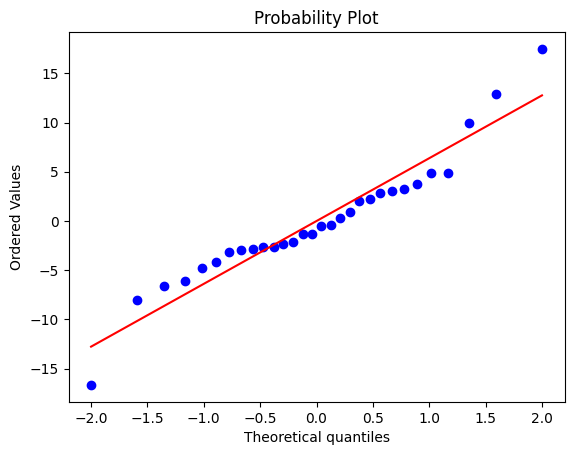

In [279]:
pred_val = model.fittedvalues.copy()
true_val = df['Defective'].values.copy()
residual = true_val - pred_val

import scipy as sp
fig, ax = plt.subplots()
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

### Interpretation of the Second Model (ANSWER FOR PROBLEM 2)

The assumptions of normality and autocorrelation are mostly met in our final model. The Omnibus and Jarque-Bera tests show no major issues with normality, as their p-values are high (above 0.05), indicating that the residuals are approximately normally distributed. The Durbin-Watson statistic falls a little higher than we want, but should still be relatively fine (2.335). As it is temperature, it should be noted to investigate further.

The assumption of multicollinearity is violated, as observed earlier in our analysis, where the Temperature variable had a VIF of approximately 14. This indicates a high level of correlation among the variables, which can distort regression results. To address the multicollinearity issue, we removed all variables with high p-values that were contributing to the high VIFs. After eliminating these variables, we were left with the Temperature_square variable, which remained significant and provided a better fit for the model.
